In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [3]:
import pandas.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
%matplotlib inline

In [5]:
from pandas_datareader import data,wb

In [6]:
from datetime import datetime

In [7]:
tech_list = ['APP','GOOG','MSFT','AMZN']

In [8]:
end = datetime(2016,1,1)
start = datetime(end.year - 1,end.month,end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [10]:
APP.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.666505,0.660981,0.663955,0.664267,5226.375494,0.664267
std,0.068398,0.071902,0.069510,0.069447,14906.812563,0.069447
min,0.565000,0.520000,0.535000,0.532500,0.000000,0.532500
25%,0.603800,0.596300,0.601300,0.602500,0.000000,0.602500
50%,0.640000,0.635000,0.635000,0.635000,0.000000,0.635000
75%,0.738800,0.738800,0.738800,0.738800,795.000000,0.738800
max,0.817500,0.785000,0.792500,0.785000,108964.000000,0.785000


In [11]:
APP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2014-12-31 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    int64  
 5   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


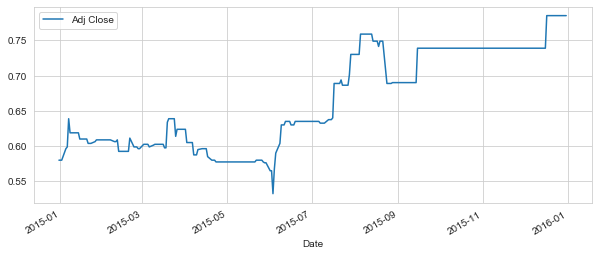

In [12]:
APP['Adj Close'].plot(legend = True,figsize = (10,4))

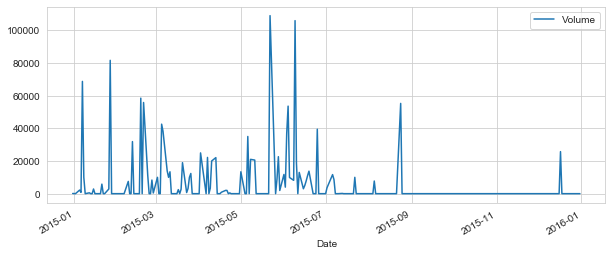

In [13]:
APP['Volume'].plot(legend = True,figsize = (10,4))

In [14]:
# WE WILL DO MOVING AVERAGE FOR ADJ PRICE \
ma_day = [10,20,30,40,50,100]
for ma in ma_day:
    column_name = 'ma of %s days' %(str(ma))
    APP[column_name] = APP['Adj Close'].rolling(ma).mean()

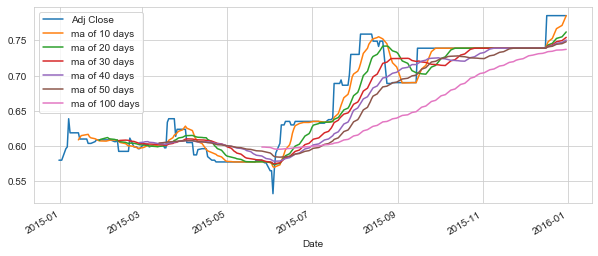

In [15]:
APP[['Adj Close','ma of 10 days','ma of 20 days','ma of 30 days','ma of 40 days','ma of 50 days','ma of 100 days']].plot(figsize = (10,4),subplots = False,legend = True)

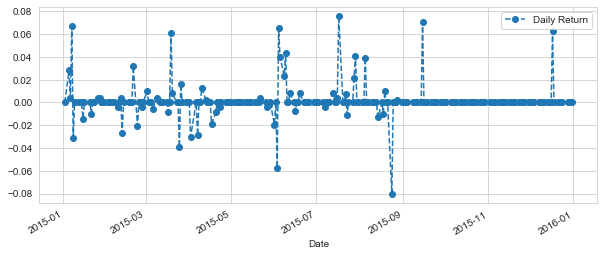

In [16]:
APP['Daily Return'] = APP['Adj Close'].pct_change()
APP['Daily Return'].plot(figsize = (10,4),linestyle = '--',marker = 'o',legend = True)

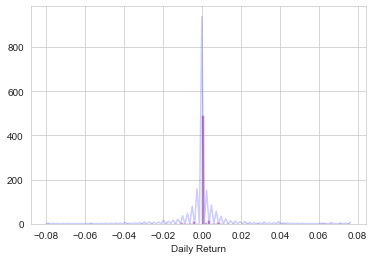

In [17]:
sns.distplot(APP['Daily Return'].dropna(),bins = 100,color = 'purple',kde_kws={'alpha':0.2,'color':'blue'})

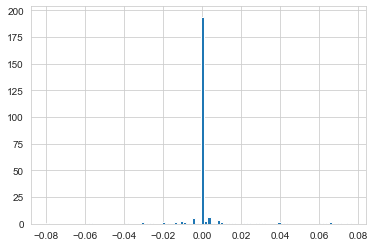

In [18]:
APP['Daily Return'].hist(bins= 100)

In [19]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
closing_df.head()

Symbols,APP,GOOG,MSFT,AMZN
Date,,,,
2014-12-31,0.5800,524.958740,41.371773,310.350006
2015-01-02,0.5800,523.373108,41.647892,308.519989
2015-01-05,0.5963,512.463013,41.264908,302.190002
2015-01-06,0.5988,500.585632,40.659245,295.290009
2015-01-07,0.6388,499.727997,41.175831,298.420013


In [21]:
tech_ret = closing_df.pct_change()

In [22]:
tech_ret.head()

Symbols,APP,GOOG,MSFT,AMZN
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-01-02,0.000000,-0.003020,0.006674,-0.005897
2015-01-05,0.028103,-0.020846,-0.009196,-0.020517
2015-01-06,0.004193,-0.023177,-0.014677,-0.022833
2015-01-07,0.066800,-0.001713,0.012705,0.010600


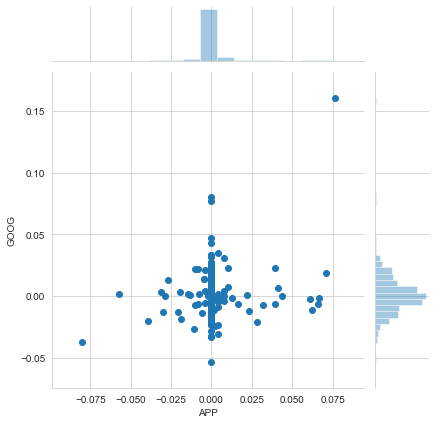

In [23]:
sns.jointplot('APP','GOOG',tech_ret,kind = 'scatter')

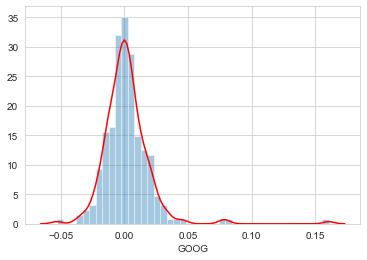

In [24]:
sns.distplot(tech_ret['GOOG'].dropna(),kde_kws = {'color':'red'})

In [25]:
#pair analysis plot

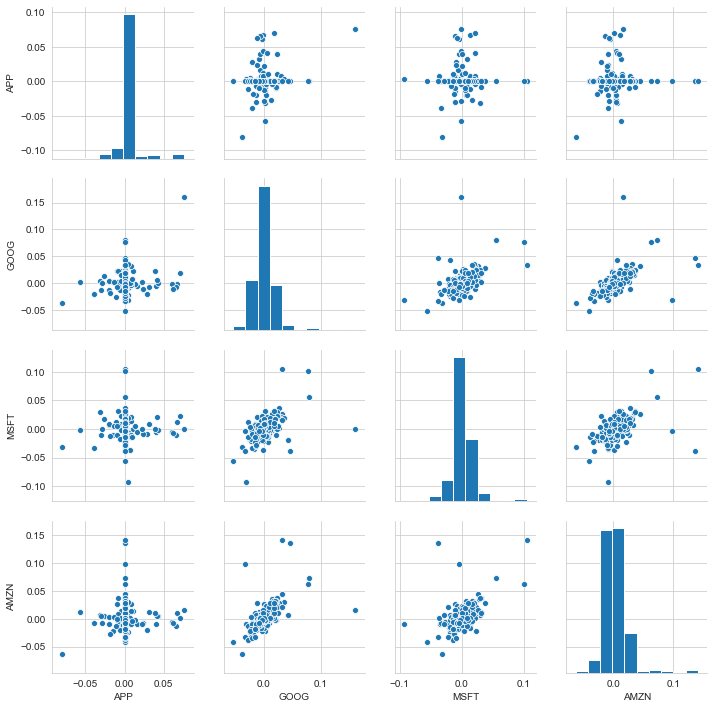

In [26]:
sns.pairplot(tech_ret.dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib

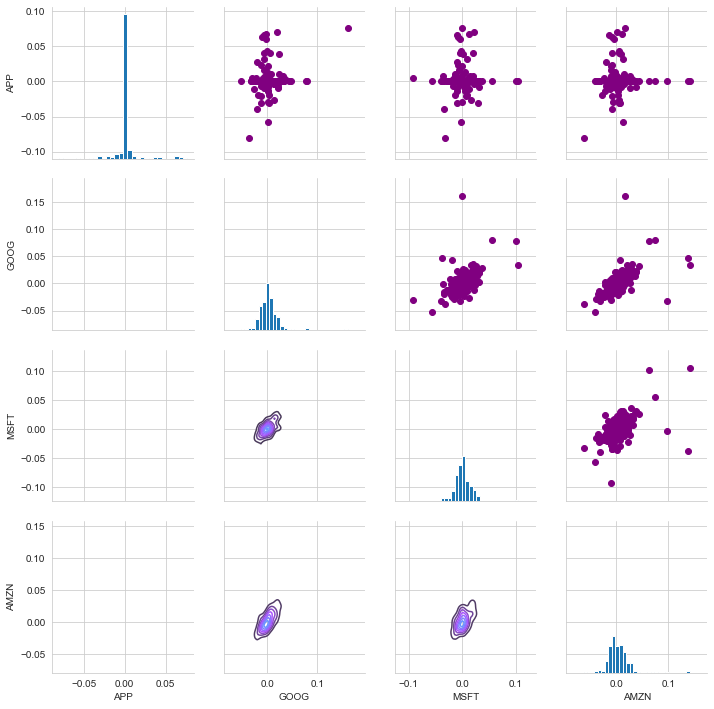

In [27]:
ret_fig = sns.PairGrid(tech_ret.dropna())
ret_fig.map_upper(plt.scatter,color = 'purple')
ret_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
ret_fig.map_diag(plt.hist,bins = 30)

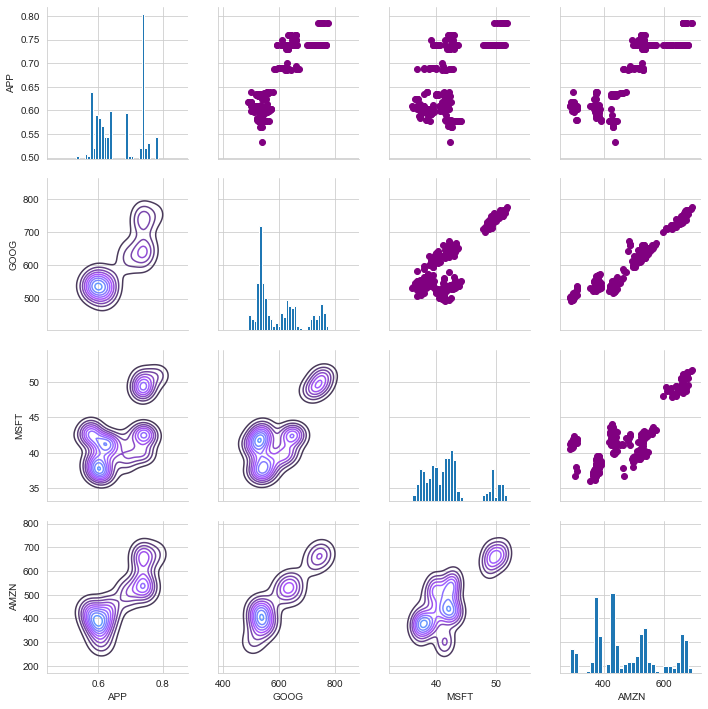

In [28]:

ret_fig = sns.PairGrid(closing_df.dropna())
ret_fig.map_upper(plt.scatter,color = 'purple')
ret_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
ret_fig.map_diag(plt.hist,bins = 30)

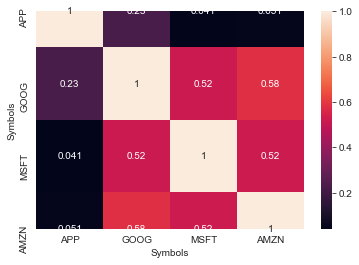

In [29]:
sns.heatmap(tech_ret.dropna().corr(),annot = True,)

In [30]:
retr =  tech_ret.dropna()

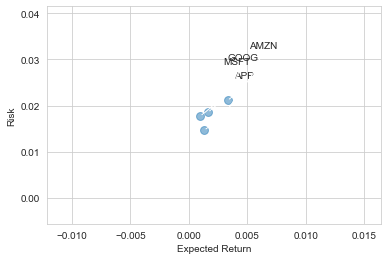

In [67]:
area = np.pi*20
plt.scatter(retr.mean(),retr.std(),alpha = 0.5,s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')


for label, x, y in zip(retr.columns, retr.mean(), retr.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.2'))



In [44]:
# MONTE CARLO METHOD
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = retr.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = retr.std()['GOOG']

In [55]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift ΔS=S(μΔt+σϵ√Δt)
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [56]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,531.141724,524.360352,529.795471,524.958740,1368200.0,524.958740
2015-01-02,529.815369,522.665039,527.561584,523.373108,1447500.0,523.373108
2015-01-05,522.894409,511.655243,521.827332,512.463013,2059800.0,512.463013
2015-01-06,514.761719,499.678131,513.589966,500.585632,2899900.0,500.585632
2015-01-07,505.855164,498.281952,505.611847,499.727997,2065000.0,499.727997


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

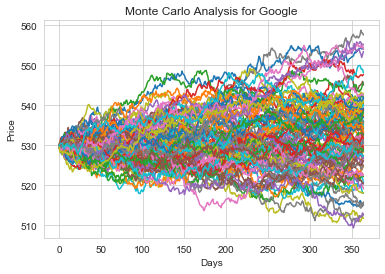

In [61]:
# Get start price from GOOG.head()
start_price = 529.795471

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [62]:
runs = 10000
simulations = np.zeros(runs)
for i in range(runs):
    simulations[i] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

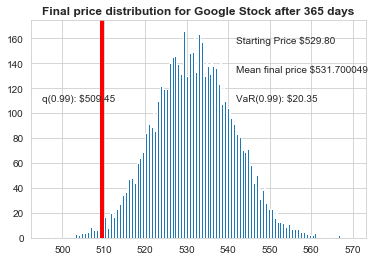

In [65]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins = 200)
plt.figtext(0.6,0.8,'Starting Price $%.2f'%start_price)
plt.figtext(0.6,0.7,'Mean final price $%2f'%simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x = q,linewidth = 4,color = 'r')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')
